### Loading required liabraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import seaborn as sns
import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scipy
from sklearn.model_selection import train_test_split



### Loading and creating DataFrame

In [2]:
df = pd.read_csv('salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
null_values= df.isnull().sum().sum()
print('Number of missing values is: ',null_values)
null = df[df.salary.isnull()]
null

Number of missing values is:  1


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


### Filling null value with the mean

In [4]:
df['salary'].fillna(df['salary'].mean(),inplace = True)
df = df.drop_duplicates()



### 1. Splitting the data set to training and testing

In [5]:
# y = df.salary
# x = df
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

train_x, test_x, train_y, test_y = train_test_split(df, df.salary, test_size=0.3, random_state=100)
#train_x.head()

### Looking at feautures that are highly correlated with salary

In [6]:
data_corr =train_x.corr().iloc[:,0].sort_values()
data_corr

Field         -0.531328
yearsabs      -0.113223
degree         0.047555
otherqual      0.130228
exprior        0.143172
male           0.380671
market         0.416172
yearsrank      0.599571
yearsworked    0.606962
position       0.716896
salary         1.000000
Name: salary, dtype: float64

- From this I can see that position is highly correlated with salary 
- There is a slight corrilation betwwen salary and years ranked.
- There is a slight corrilation betwwen salary and years worked.
- There is also a slight negetive correlation between salary and Field

### Checking for descriptive statistics table

In [7]:
df_new = train_x[['salary','yearsworked', 'yearsrank','position','Field']]


In [8]:
df_new.describe()

,salary,yearsworked,yearsrank,position,Field
count,359.000000,359.000000,359.000000,359.000000,359.000000
mean,51607.590936,13.206128,7.217270,2.178273,2.495822
std,12607.848642,9.504005,6.341548,0.816366,1.120833
min,29000.000000,0.000000,0.000000,1.000000,1.000000
25%,40512.000000,4.000000,2.000000,1.000000,1.000000
50%,52172.000000,12.000000,5.000000,2.000000,3.000000
75%,61065.500000,22.000000,12.000000,3.000000,3.000000
max,96156.000000,35.000000,24.000000,3.000000,4.000000


### Creating Histograms for the variables of interest

In [9]:
#df_new.hist(figsize=(16, 20),bins=20, xlabelsize=8, ylabelsize=8)

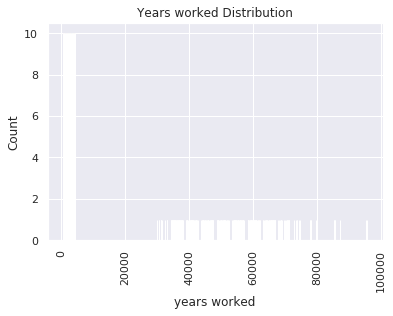

In [11]:
sns.set()
plt.hist(x= train_x, bins=20)
plt.xlabel('years worked')
plt.xticks(rotation= 90, horizontalalignment='center')
plt.ylabel('Count')
plt.title('Years worked Distribution')
plt.show()